In [1]:
import matching.glema.common.utils.arg_utils as arg_utils
import matching.glema.common.utils.graph_utils as graph_utils
import matching.glema.common.utils.plot_utils as plot_utils

In [2]:
args = arg_utils.parse_args( use_default=True )
args.dataset = "CPG"
args.directed = True
args.iso = True
args.test_data = True

In [3]:
record_scopes = graph_utils.get_record_scopes( args )
design_patterns = graph_utils.get_design_patterns( args )
label_args = {
    "record_scopes": record_scopes,
    "design_patterns": design_patterns
}

In [4]:
source_graph_idx = 8
query_subgraph_idx = 0

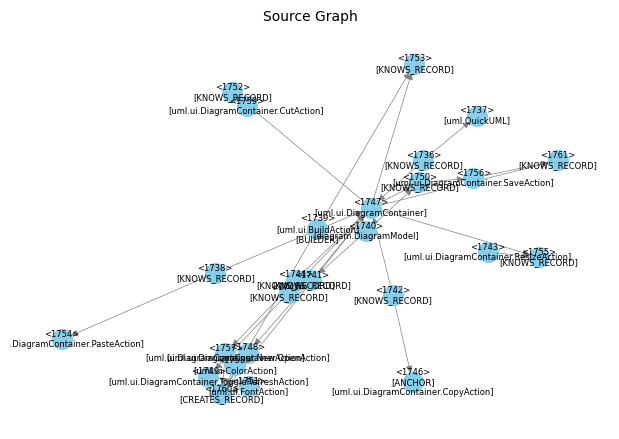

In [5]:
source = graph_utils.load_source_graph( args, source_graph_idx )
plot_utils.plot_graph( source,
                  title="Source Graph",
                  nodeLabels=graph_utils.get_node_labels( source, **label_args ) )

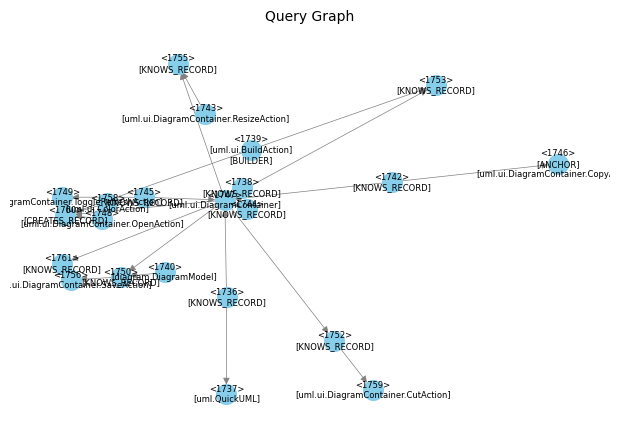

In [6]:
query = graph_utils.load_query_graph( args, source_graph_idx, query_subgraph_idx )
plot_utils.plot_graph( query,
                  title="Query Graph",
                  nodeLabels=graph_utils.get_node_labels( query, **label_args ) )

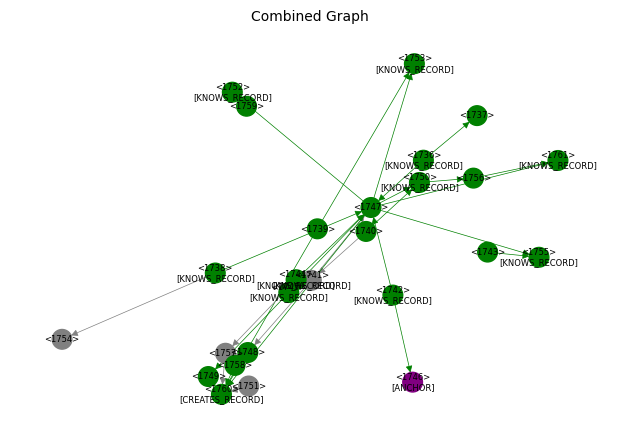

In [7]:
matching_colors = {
    2: "purple",
    1: "green",
    0: "grey",
    -1: "red"
}
combined, node_colors, edge_colors = graph_utils.combine_graph( source, query,
                                                          matching_colors=matching_colors )
plot_utils.plot_graph(
    title="Combined Graph",
    graph=combined,
    nodeColors=node_colors,
    edgeColors=edge_colors,
    nodeLabels=graph_utils.get_node_labels( combined )
)

In [8]:
args.test_data = True
args.iso = True
total_anchors_queries = 0
total_queries = 0
for source_graph_idx, source_graph in graph_utils.load_source_graphs( args ).items():
    anchors_queries_per_source = 0
    queries_per_source = 0
    for query_graph_idx, query_graph in graph_utils.load_query_graphs( args, source_graph_idx ).items():
        
        _, node_matches, _ = graph_utils.combine_graph( source_graph, query_graph )
        
        has_anchor = any( node_match == 2 for node_match in node_matches )
        if has_anchor:
            anchors_queries_per_source += 1
            total_anchors_queries += 1
        queries_per_source += 1
        total_queries += 1
    print( f"Queries with anchors found for source #{source_graph_idx}: {anchors_queries_per_source}/{queries_per_source}" )
print( f"Queries with anchors found: {total_anchors_queries}/{total_queries}" )

Queries with anchors found for source #0: 30/30
Queries with anchors found for source #1: 32/32
Queries with anchors found for source #2: 31/31
Queries with anchors found for source #3: 35/35
Queries with anchors found for source #4: 29/29
Queries with anchors found for source #5: 26/26
Queries with anchors found for source #6: 26/26
Queries with anchors found for source #7: 34/34
Queries with anchors found for source #8: 28/28
Queries with anchors found for source #9: 32/32
Queries with anchors found for source #10: 34/34
Queries with anchors found for source #11: 26/26
Queries with anchors found for source #12: 26/26
Queries with anchors found for source #13: 38/38
Queries with anchors found for source #14: 33/33
Queries with anchors found for source #15: 37/37
Queries with anchors found for source #16: 31/31
Queries with anchors found for source #17: 32/32
Queries with anchors found for source #18: 29/29
Queries with anchors found for source #19: 31/31
Queries with anchors found for